Examine the parameter constraints from Manodeep's MCMC chain

In [11]:
import numpy as np 
import corner as DFM

import env
import util as UT
import infer as Inf

import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
chain = Inf.mcmc_chains('manodeep')

In [4]:
chain_arr = np.array([chain['logMmin'], chain['sig_logM'], chain['logM0'], chain['logM1'], chain['alpha']]).T

In [6]:
# thin it out
chain_thin = chain_arr[::32]

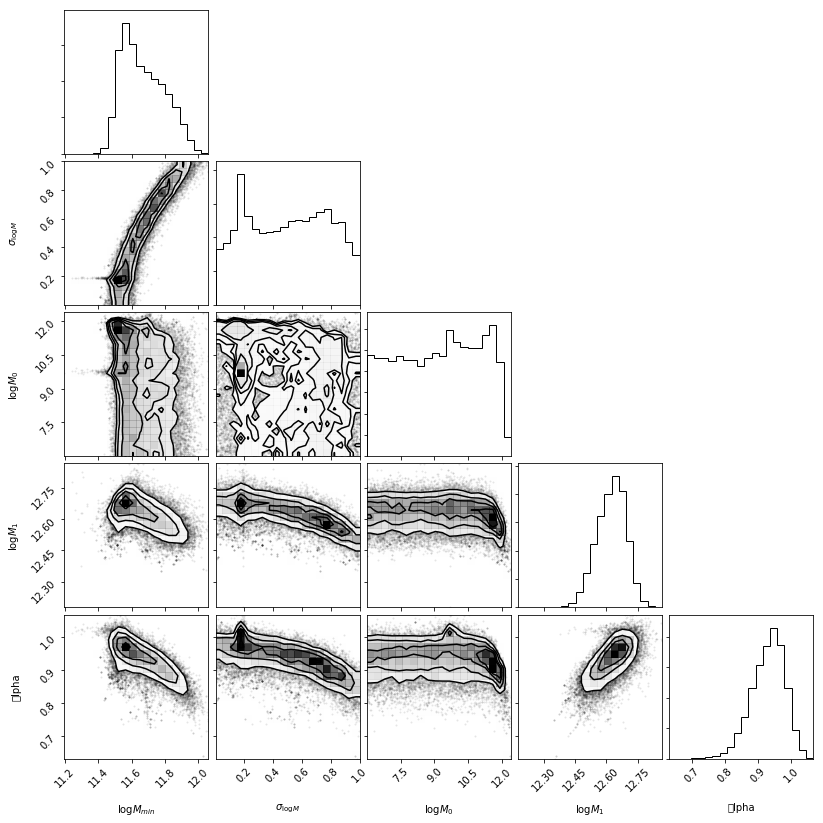

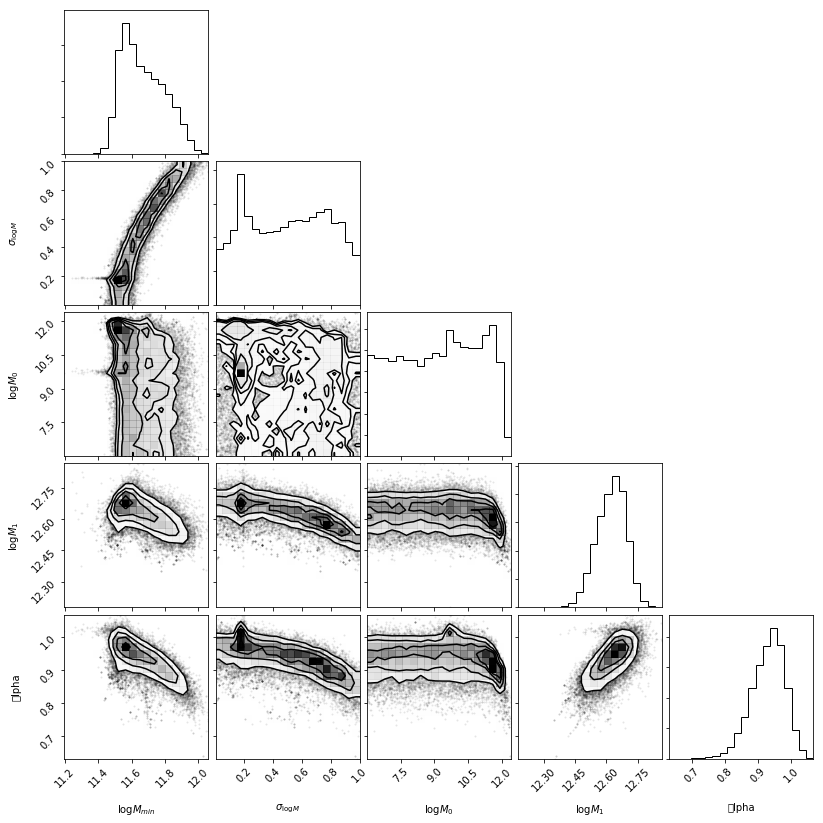

In [10]:
DFM.corner(chain_thin, 
           labels=['$\log M_{min}$', '$\sigma_{\log M}$', '$\log M_0$', '$\log M_1$', '\alpha'])

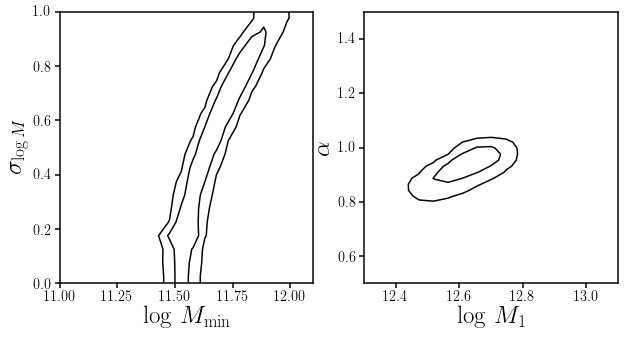

In [30]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
DFM.hist2d(chain['logMmin'], chain['sig_logM'], levels=[0.68, 0.95], bins=20,
           plot_datapoints=False, plot_density=False, axes=sub)
# x-axis
sub.set_xlim([11.,12.1])
sub.set_xlabel('log $M_\mathrm{min}$', fontsize=25)
# y-axis
sub.set_ylim([0.,1.])
sub.set_ylabel('$\sigma_{\log M}$', fontsize=25)

sub = fig.add_subplot(122)
DFM.hist2d(chain['logM1'], chain['alpha'], levels=[0.68, 0.95], bins=20,
           plot_datapoints=False, plot_density=False, axes=sub)
# x-axis
sub.set_xlim([12.3,13.1])
sub.set_xlabel('log $M_1$', fontsize=25)
# y-axis
sub.set_ylim([0.5,1.5])
sub.set_ylabel(r'$\alpha$', fontsize=25)